In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier

In [2]:
mnist_path="../mnist_data/"

In [3]:
def load_mnist(path):
    #path:mnist data path
    mnist=fetch_openml('mnist_784',data_home=path)
    image=mnist['data']#shape:(70000,784)
    image=image/255
    label=mnist['target']#shape:(70000,)
    return image,label

In [4]:
def knn(train_image,train_label,test_image,test_label,k):
    #input:(60000,784)/(60000,)/(10000,784) type:ndarray
    predict=np.zeros((np.shape(test_image)[0],k))
    for i in range(np.size(test_image,0)):
        knn_list=[]
        for j in range(np.shape(train_image)[0]):
            knn_list.append(np.linalg.norm(train_image[j,:]-test_image[i,:]))
        #print('-----------------------------------')
        index_list=sorted(range(len(knn_list)),key=lambda p:knn_list[p])[:k]
        predict[i,:]=np.array([train_label[index_list]])
       
        #print("test image id:%d label:%s prediction:"%(i+1,test_label[i]))
        #print(predict[i,:])
    #print(predict)
    return predict

In [5]:
image,label=load_mnist(mnist_path)
train_image=image[:60000,:]
test_image=image[60000:,:]
train_label=label[:60000]
test_label=label[60000:]

In [6]:
neigh=KNeighborsClassifier(n_neighbors=10)
neigh.fit(train_image,train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [7]:
predict_label=neigh.predict(test_image)

In [8]:
result_matrix=np.zeros((10,10))
for i in range(len(predict_label)):
    x=int(test_label[i])-1
    y=int(predict_label[i])-1
    result_matrix[x,y]=result_matrix[x,y]+1

In [9]:
precision=np.zeros(10)
recall=np.zeros(10)
for i in range(10):
    precision[i]=result_matrix[i,i]/sum(result_matrix[:,i])
    recall[i]=result_matrix[i,i]/sum(result_matrix[i,:])
print(precision)
print(recall)

[0.94333333 0.982      0.96825397 0.97409326 0.97075366 0.97720207
 0.95715677 0.98597627 0.95143707 0.96237624]
[0.99735683 0.95155039 0.96633663 0.95723014 0.96748879 0.98434238
 0.95622568 0.93839836 0.95143707 0.99183673]


0.9665


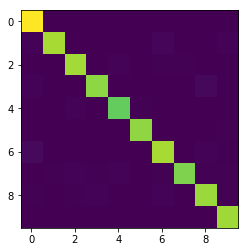

In [10]:
plt.imshow(result_matrix/10000)
print(neigh.score(test_image,test_label))